In [1]:
import numpy as np
import matplotlib.pylab as plt
from copy import copy as cp
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import sys
sys.path.append('..')
import math
import copy

In [2]:
# Defining the class
class NeumannPixel:
    def report(self):
        print('For this instance ...')
        print('   ix and iy are:', self.ix,self.iy)
        print('   fluxes are:', self.flux_up,self.flux_down,self.flux_left,self.flux_right)
    def get_positions(self):
        return(self.ix,self.iy)

In [3]:
# def self_clean(list1):
#     droplist = []
#     for q in range(len(list1)-1):
#         for i in range(q+1,len(list1)):
#             if (list1[i].ix == list1[q].ix and list1[i].iy == list1[q].iy):
#                 droplist.append(i)
#     for j in range(len(droplist)):
#         i = droplist[j]
#         print('Dropping item', i,' (value =', list1[i],')')
#     print(droplist)
#     for i in range(len(droplist)):
#         list1.pop(droplist[i]-i)
#     return(list1)

# #removes elements in list 1 found in list 2
# def other_clean(list1,list2):
#     droplist = []
#     for q in range(len(list1)-1):
#         for i in range(len(list2)):
#             if (list1[q].ix == list2[i].ix and list1[q].iy == list2[i].iy):
#                 droplist.append(i)
#     for j in range(len(droplist)):
#         i = droplist[j]
#         print('Dropping item', i,' (value =', list1[i],')')
#     print(droplist)
#     for i in range(len(droplist)):
#         list1.pop(droplist[i]-i)
#     return(list1)

In [84]:
# original integer (working on changing color)
class PixelArray:
    def makeedgearray(self,k):
        theta = math.pi/3
        self.pixellist_edge = []
        for i in range (k):
            neumannpixel = NeumannPixel()
            neumannpixel.ix = i
            neumannpixel.iy = 0
            self.pixellist_edge.append(neumannpixel)
        for i in range (k):
            neumannpixel = NeumannPixel()
            ix_old = self.pixellist_edge[i].ix
            iy_old = self.pixellist_edge[i].iy
            neumannpixel.ix = int(ix_old*(math.cos(-theta))-iy_old*(math.sin(theta)))+k
            neumannpixel.iy = int(ix_old*(math.sin(-theta))+iy_old*(math.cos(theta)))
            self.pixellist_edge.append(neumannpixel)
        for i in range (k):
            neumannpixel = NeumannPixel()
            ix_old = self.pixellist_edge[i].ix
            iy_old = self.pixellist_edge[i].iy
            neumannpixel.ix = int(ix_old*(math.cos(theta))-iy_old*(math.sin(theta)))+k
            neumannpixel.iy = int(ix_old*(math.sin(theta))+iy_old*(math.cos(theta)))-int(math.sin(theta)*k*2)
            self.pixellist_edge.append(neumannpixel)
        for i in range (k):
            neumannpixel = NeumannPixel()
            neumannpixel.ix = i
            neumannpixel.iy = -int(math.sin(theta)*k*2)
            self.pixellist_edge.append(neumannpixel)
        for i in range (k):
            neumannpixel = NeumannPixel()
            ix_old = self.pixellist_edge[i].ix
            iy_old = self.pixellist_edge[i].iy
            neumannpixel.ix = int(ix_old*(math.cos(2*theta))-iy_old*(math.sin(2*theta)))
            neumannpixel.iy = int(ix_old*(math.sin(2*theta))+iy_old*(math.cos(2*theta)))-int(math.sin(theta)*k*2)
            self.pixellist_edge.append(neumannpixel)
        for i in range (k):
            neumannpixel = NeumannPixel()
            ix_old = self.pixellist_edge[i].ix
            iy_old = self.pixellist_edge[i].iy
            neumannpixel.ix = int(ix_old*(math.cos(-2*theta))-iy_old*(math.sin(2*theta)))
            neumannpixel.iy = int(ix_old*(math.sin(-2*theta))+iy_old*(math.cos(2*theta)))
            self.pixellist_edge.append(neumannpixel)
        #eliminating duplicates
        self.resultlist = []
        self.xylist = []
        for neumann in self.pixellist_edge:
            if neumannpixel not in self.resultlist:
                self.resultlist.append(neumannpixel)
#         for i in range (len(self.pixellist_edge)-1):
#             self.xylist.append([self.pixellist_edge[i].ix, self.pixellist_edge[i].iy])
#         print('xylist', self.xylist)
#         self.result = []
#         for i in self.xylist:
#             if i not in self.result:
#                 self.result.append(i)
#         print('result ', self.result)
       

    def makefillarray(self,k):
        self.fillpixellist = []
        for p in range (k):
            for i in range (-1*self.pixellist_edge[4*k+p].iy+self.pixellist_edge[5*k+p].iy+1):
                neumannpixel = NeumannPixel()
                neumannpixel.ix = self.pixellist_edge[5*k+p].ix
                neumannpixel.iy = self.pixellist_edge[5*k+p].iy-i
                self.fillpixellist.append(neumannpixel)
        for n in range (k):
            for i in range (self.pixellist_edge[n].iy-self.pixellist_edge[k*3+n].iy+1):
                neumannpixel = NeumannPixel()
                neumannpixel.ix = self.pixellist_edge[n].ix
                neumannpixel.iy = self.pixellist_edge[n].iy-i
                self.fillpixellist.append(neumannpixel)
        for m in range (k):
            for i in range (-1*self.pixellist_edge[2*k+m].iy+self.pixellist_edge[k+m].iy+1):
                neumannpixel = NeumannPixel()
                neumannpixel.ix = self.pixellist_edge[k+m].ix
                neumannpixel.iy = self.pixellist_edge[k+m].iy-i
                self.fillpixellist.append(neumannpixel)
                
                  
    def makeoutsidearray(self,k):
        theta = math.pi/3
        neumanndefault = 1
        self.pixellist_outside = []
        for i in range (k):
            neumannpixel = NeumannPixel()
            neumannpixel.ix = i
            neumannpixel.iy = 1
            neumannpixel.flux_up = 0
            neumannpixel.flux_right = 0
            neumannpixel.flux_down = 1
            neumannpixel.flux_left = 0
#             print('outsidepixel= ', neumannpixel.ix, neumannpixel.iy)
#             print('up=', neumannpixel.flux_up, 'right= ', neumannpixel.flux_right, 'down=', neumannpixel.flux_down, 'left=', neumannpixel.flux_left,)
            self.pixellist_outside.append(neumannpixel)
        for i in range (k):
            neumannpixel = NeumannPixel()
            neumannpixel.ix = self.pixellist_edge[k+i].ix
            neumannpixel.iy = self.pixellist_edge[k+i].iy+1
            neumannpixel.flux_up = 0
            neumannpixel.flux_right = 0
            if neumannpixel.ix == self.pixellist_edge[k+i].ix and neumannpixel.iy-1 == self.pixellist_edge[k+i].iy:
                neumannpixel.flux_down = 1
            else:
                neumannpixel.flux_down = 0
            if i<2:
                neumannpixel.flux_left = 0
            else:
                neumannpixel.flux_left = 1
#             print('outsidepixel= ', neumannpixel.ix, neumannpixel.iy)
#             print('up=', neumannpixel.flux_up, 'right= ', neumannpixel.flux_right, 'down=', neumannpixel.flux_down, 'left=', neumannpixel.flux_left,)
            self.pixellist_outside.append(neumannpixel)
        neumannpixel = NeumannPixel()
        neumannpixel.ix = self.pixellist_outside[len(self.pixellist_outside)-1].ix+1
        neumannpixel.iy = self.pixellist_outside[len(self.pixellist_outside)-1].iy-1
        neumannpixel.flux_up = 0
        neumannpixel.flux_right = 0
        neumannpixel.flux_down = 0
        neumannpixel.flux_left = 1
        self.pixellist_outside.append(neumannpixel)
        for i in range (k):
            neumannpixel = NeumannPixel()
            neumannpixel.ix = self.pixellist_edge[2*k+i].ix
            neumannpixel.iy = self.pixellist_edge[2*k+i].iy-1
            if neumannpixel.ix == self.pixellist_edge[2*k+i].ix and neumannpixel.iy+1 == self.pixellist_edge[2*k+i].iy:
                neumannpixel.flux_up = 1
            else:
                neumannpixel.flux_up = 0
            neumannpixel.flux_right = 0
            neumannpixel.flux_down = 0
            if i<2:
                neumannpixel.flux_left = 0
            else:
                neumannpixel.flux_left = 1
#             print('outsidepixel= ', neumannpixel.ix, neumannpixel.iy)
#             print('up=', neumannpixel.flux_up, 'right= ', neumannpixel.flux_right, 'down=', neumannpixel.flux_down, 'left=', neumannpixel.flux_left,)
            self.pixellist_outside.append(neumannpixel)
        neumannpixel = NeumannPixel()
        neumannpixel.ix = self.pixellist_outside[len(self.pixellist_outside)-1].ix+1
        neumannpixel.iy = self.pixellist_outside[len(self.pixellist_outside)-1].iy+1
        neumannpixel.flux_up = 0
        neumannpixel.flux_right = 0
        neumannpixel.flux_down = 0
        neumannpixel.flux_left = 1
        self.pixellist_outside.append(neumannpixel)
        for i in range (k):
            neumannpixel = NeumannPixel()
            neumannpixel.ix = i
            neumannpixel.iy = -int(math.sin(theta)*k*2)-1
            neumannpixel.flux_up = 1
            neumannpixel.flux_right = 0
            neumannpixel.flux_down = 0
            neumannpixel.flux_left = 0
            self.pixellist_outside.append(neumannpixel)
        for i in range (k):
            neumannpixel = NeumannPixel()
            neumannpixel.ix = self.pixellist_edge[4*k+i].ix
            neumannpixel.iy = self.pixellist_edge[4*k+i].iy-1
            if neumannpixel.ix == self.pixellist_edge[4*k+i].ix and neumannpixel.iy+1 == self.pixellist_edge[4*k+i].iy:
                neumannpixel.flux_up = 1
            else:
                neumannpixel.flux_up = 0
            if i<2:
                neumannpixel.flux_right = 0
            else:
                neumannpixel.flux_right = 1
            neumannpixel.flux_down = 0
            neumannpixel.flux_left = 0
#             print('outsidepixel= ', neumannpixel.ix, neumannpixel.iy)
#             print('up=', neumannpixel.flux_up, 'right= ', neumannpixel.flux_right, 'down=', neumannpixel.flux_down, 'left=', neumannpixel.flux_left,)
            self.pixellist_outside.append(neumannpixel)
        neumannpixel = NeumannPixel()
        neumannpixel.ix = self.pixellist_outside[len(self.pixellist_outside)-1].ix-1
        neumannpixel.iy = self.pixellist_outside[len(self.pixellist_outside)-1].iy+1
        neumannpixel.flux_up = 0
        neumannpixel.flux_right = 1
        neumannpixel.flux_down = 0
        neumannpixel.flux_left = 0
        self.pixellist_outside.append(neumannpixel)
        for i in range (k):
            neumannpixel = NeumannPixel()
            neumannpixel.ix = self.pixellist_edge[5*k+i].ix
            neumannpixel.iy = self.pixellist_edge[5*k+i].iy+1
            neumannpixel.flux_up = 0
            if i<2:
                neumannpixel.flux_right = 0
            else:
                neumannpixel.flux_right = 1
            if neumannpixel.ix == self.pixellist_edge[5*k+i].ix and neumannpixel.iy-1 == self.pixellist_edge[5*k+i].iy:
                neumannpixel.flux_down = 1
            else:
                neumannpixel.flux_down = 0
            neumannpixel.flux_left = 0
#             print('outsidepixel= ', neumannpixel.ix, neumannpixel.iy)
#             print('up=', neumannpixel.flux_up, 'right= ', neumannpixel.flux_right, 'down=', neumannpixel.flux_down, 'left=', neumannpixel.flux_left,)
            self.pixellist_outside.append(neumannpixel)
        neumannpixel = NeumannPixel()
        neumannpixel.ix = self.pixellist_outside[len(self.pixellist_outside)-1].ix-1
        neumannpixel.iy = self.pixellist_outside[len(self.pixellist_outside)-1].iy-1
        neumannpixel.flux_up = 0
        neumannpixel.flux_right = 1
        neumannpixel.flux_down = 0
        neumannpixel.flux_left = 0
        self.pixellist_outside.append(neumannpixel)

#         self.filtered_list = []
#         for q in range (len(self.pixellist_outside)):
#             for i in range (len(self.pixellist_edge)):
#                 if self.pixellist_outside[q].ix==self.pixellist_edge[i].ix and self.pixellist_outside[q].iy==self.pixellist_edge[i].iy:
#                     self.filtered_list.append(self.pixellist_outside[q])
#         self.newlist = list(set(self.pixellist_outside).difference(self.filtered_list))

#         self.copylist = copy.deepcopy(self.pixellist_outside)
#         self.droplist = []
#         for q in range (len(self.pixellist_outside)-1):
#             for i in range (len(self.pixellist_edge)):
#                 if self.pixellist_outside[q].ix==self.pixellist_edge[i].ix and self.pixellist_outside[q].iy==self.pixellist_edge[i].iy:
#                     self.droplist.append(i)
#             for j in range(len(self.droplist)):
#                 s = self.droplist[j]
#                 print('Dropping item: ', s, 'values= ', self.pixellist_outside[s+1].ix, self.pixellist_outside[s+1].iy)
#             print('Drop list= ', self.droplist)
#             for k in range (len(self.droplist)):
#                 self.copylist.pop(self.droplist[k]-k)
            
#         self.newlist2 = self.newlist
#         for q in range (len(self.newlist)-1):
#             for i in range (q+1,len(self.newlist)+1):
#                 if self.newlist[q].ix==self.newlist[i].ix and self.newlist[q].iy==self.newlist[i].iy:
#                     self.newlist2.remove(self.newlist[i])

#     def edge_clean(self):
#         droplist = []
#         for q in range(len(self.pixellist_edge)-1):
#             for i in range(q+1,len(self.pixellist_edge)):
#                 if (self.pixellist_edge[i].ix == self.pixellist_edge[q].ix and self.pixellist_edge[i].iy == self.pixellist_edge[q].iy):
#                     droplist.append(i)
#         for j in range(len(droplist)):
#             i = droplist[j]
#             print('Dropping item', i,' (value =', list1[i],')')
#         print(droplist)
#         for i in range(len(droplist)):
#             list1.pop(droplist[i]-i)
#         return(list1)

# #removes elements in list 1 found in list 2
#     def other_clean(list1,list2):
#         droplist = []
#         for q in range(len(list1)-1):
#             for i in range(len(list2)):
#                 if (list1[q].ix == list2[i].ix and list1[q].iy == list2[i].iy):
#                     droplist.append(i)
#         for j in range(len(droplist)):
#             i = droplist[j]
#             print('Dropping item', i,' (value =', list1[i],')')
#         print(droplist)
#         for i in range(len(droplist)):
#             list1.pop(droplist[i]-i)
#         return(list1)
    
    def report_edge(self):
        print('edge list has ', len(self.pixellist_edge), ' pixels')
        for neumannpixel in self.pixellist_edge:
            print(neumannpixel.ix, neumannpixel.iy)
    def report_newedge(self):
        print('new edge list has ', len(self.outsideresult), ' pixels')
        for neumannpixel in self.outsideresult:
            print(neumannpixel.ix, neumannpixel.iy)
    def report_fill(self):
        print(len(self.fillpixellist))
    def report_outside(self):
        print('outside list has ', len(self.pixellist_outside), ' pixels')
        for neumannpixel in self.pixellist_outside:
            print(neumannpixel.ix, neumannpixel.iy)
        
    def plot(self):
        plt.figure()
        plt.gca().set_aspect('equal')
        plt.grid(True)
        for neumannpixel in self.pixellist_edge:
            plt.plot(neumannpixel.ix,neumannpixel.iy, 'ro')
            print(neumannpixel.ix, neumannpixel.iy)
        for neumannpixel in self.resultlist:
            plt.plot(neumannpixel.ix,neumannpixel.iy, 'kx')
            print(neumannpixel.ix, neumannpixel.iy)
#         for neumannpixel in self.fillpixellist:
#             plt.plot(neumannpixel.ix,neumannpixel.iy, 'ko')
#             print(neumannpixel.ix, neumannpixel.iy)
#         for neumannpixel in self.pixellist_outside:
#             plt.plot(neumannpixel.ix,neumannpixel.iy, 'gx')
# #             print(neumannpixel.ix, neumannpixel.iy)
            

0 0
1 0
2 0
3 0
4 0
5 0
5 0
6 -1
6 -2
7 -3
5 -8
5 -8
6 -7
6 -6
7 -5
0 -8
1 -8
2 -8
3 -8
4 -8
0 -8
0 -8
0 -7
-1 -6
-1 -5
0 0
0 0
0 -1
-1 -2
-1 -3


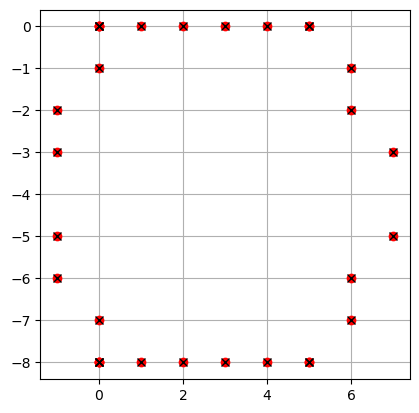

In [85]:
pixelarray1 = PixelArray()
pixelarray1.makeedgearray(5)
# pixelarray1.makefillarray(10)
# pixelarray1.makeoutsidearray(5)
# pixelarray1.report_outside()
# pixelarray1.report_edge()
pixelarray1.plot()


In [6]:
# # consecutive list
# class EdgeArray4:
#     def makearray(self,k):
#         theta = math.pi/3
#         neumanndefault = 1
#         self.pixellist = []
#         my_range = range(1,k+1)
#         my_list = list(my_range)
#         reversed_list = list(reversed(my_list))
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             neumannpixel.ix = i
#             neumannpixel.iy = 0
#             neumannpixel.flux_up = neumanndefault
#             neumannpixel.flux_down = 0
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             ix_old = self.pixellist[i].ix
#             iy_old = self.pixellist[i].iy
#             neumannpixel.ix = int(ix_old*(math.cos(-theta))-iy_old*(math.sin(theta)))+k
#             neumannpixel.iy = int(ix_old*(math.sin(-theta))+iy_old*(math.cos(theta)))
#             neumannpixel.flux_up = neumanndefault
#             neumannpixel.flux_down = 0
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             ix_old = self.pixellist[i].ix
#             iy_old = self.pixellist[i].iy
#             neumannpixel.ix = int(ix_old*(math.cos(-2*theta))-iy_old*(math.sin(-2*theta)))+k+int(k/2-1)
#             neumannpixel.iy = int(ix_old*(math.sin(-2*theta))+iy_old*(math.cos(-2*theta)))-int(math.sin(theta)*k)
#             neumannpixel.flux_up = neumanndefault
#             neumannpixel.flux_down = 0
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#         for i in reversed_list:
#             neumannpixel = NeumannPixel()
#             neumannpixel.ix = i
#             neumannpixel.iy = -int(math.sin(theta)*k*2)
#             neumannpixel.flux_up = 0
#             neumannpixel.flux_down = neumanndefault
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             ix_old = self.pixellist[i].ix
#             iy_old = self.pixellist[i].iy
#             neumannpixel.ix = int(ix_old*(math.cos(2*theta))-iy_old*(math.sin(2*theta)))
#             neumannpixel.iy = int(ix_old*(math.sin(2*theta))+iy_old*(math.cos(2*theta)))-int(math.sin(theta)*k*2)
#             neumannpixel.flux_up = neumanndefault
#             neumannpixel.flux_down = 0
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             ix_old = self.pixellist[i].ix
#             iy_old = self.pixellist[i].iy
#             neumannpixel.ix = int(ix_old*(math.cos(theta))-iy_old*(math.sin(theta)))-int(k/2-1)
#             neumannpixel.iy = int(ix_old*(math.sin(theta))+iy_old*(math.cos(theta)))-int(math.sin(theta)*k)
#             neumannpixel.flux_up = neumanndefault
#             neumannpixel.flux_down = 0
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#     def report(self):
#         print(len(self.pixellist))
#     def plot(self):
#         plt.figure()
#         plt.gca().set_aspect('equal')
#         plt.grid(True)
#         for neumannpixel in self.pixellist:
#             plt.plot(neumannpixel.ix,neumannpixel.iy, 'bo')
#             print(neumannpixel.ix, neumannpixel.iy)

In [7]:
# edgearray4 = EdgeArray4()
# edgearray4.makearray(50)
# edgearray4.plot()

In [8]:
# #centered
# class EdgeArray5:
#     def makearray(self,k):
#         theta = math.pi/3
#         neumanndefault = 1
#         self.pixellist = []
#         self.newpixlist = []
#         newstart = int(k/2)
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             neumannpixel.ix = i
#             neumannpixel.iy = 0
#             self.newpixlist.append(neumannpixel)
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             neumannpixel.ix = i-newstart
#             neumannpixel.iy = int(math.sin(theta)*k)
#             neumannpixel.flux_up = neumanndefault
#             neumannpixel.flux_down = 0
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             ix_old = self.newpixlist[i].ix
#             iy_old = self.newpixlist[i].iy
#             neumannpixel.ix = int(ix_old*(math.cos(-theta))-iy_old*(math.sin(theta)))+newstart
#             neumannpixel.iy = int(ix_old*(math.sin(-theta))+iy_old*(math.cos(theta)))+int(math.sin(theta)*k)
#             neumannpixel.flux_up = neumanndefault
#             neumannpixel.flux_down = 0
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             ix_old = self.newpixlist[i].ix
#             iy_old = self.newpixlist[i].iy
#             neumannpixel.ix = int(ix_old*(math.cos(theta))-iy_old*(math.sin(theta)))+newstart
#             neumannpixel.iy = int(ix_old*(math.sin(theta))+iy_old*(math.cos(theta)))-int(math.sin(theta)*k)
#             neumannpixel.flux_up = neumanndefault
#             neumannpixel.flux_down = 0
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             neumannpixel.ix = i-newstart
#             neumannpixel.iy = -int(math.sin(theta)*k)
#             neumannpixel.flux_up = 0
#             neumannpixel.flux_down = neumanndefault
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             ix_old = self.newpixlist[i].ix
#             iy_old = self.newpixlist[i].iy
#             neumannpixel.ix = int(ix_old*(math.cos(2*theta))-iy_old*(math.sin(2*theta)))-newstart
#             neumannpixel.iy = int(ix_old*(math.sin(2*theta))+iy_old*(math.cos(2*theta)))-int(math.sin(theta)*k)
#             neumannpixel.flux_up = neumanndefault
#             neumannpixel.flux_down = 0
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#         for i in range (k):
#             neumannpixel = NeumannPixel()
#             ix_old = self.newpixlist[i].ix
#             iy_old = self.newpixlist[i].iy
#             neumannpixel.ix = int(ix_old*(math.cos(-2*theta))-iy_old*(math.sin(2*theta)))-newstart
#             neumannpixel.iy = int(ix_old*(math.sin(-2*theta))+iy_old*(math.cos(2*theta)))+int(math.sin(theta)*k)
#             neumannpixel.flux_up = neumanndefault
#             neumannpixel.flux_down = 0
#             neumannpixel.flux_left = 0
#             neumannpixel.flux_right = 0
#             self.pixellist.append(neumannpixel)
#     def report(self):
#         print(len(self.pixellist))
#     def plot(self):
#         plt.figure()
#         plt.gca().set_aspect('equal')
#         plt.grid(True)
#         for neumannpixel in self.pixellist:
#             plt.plot(neumannpixel.ix,neumannpixel.iy, 'go')
#             print(neumannpixel.ix, neumannpixel.iy)

In [9]:
# edgearray5 = EdgeArray5()
# edgearray5.makearray(10)
# edgearray5.plot()